# Bollinger Band strategy tryout with Google Colab

Video: https://youtu.be/gEIw2iUlFYc

Belangrijke leerpunten in dit notebook:


*   Uploaden in Google met code
*   Plotten met Matplotlib
* Een functie gebruiken om dingen uit te rekenen en terug te plaatsen in het dataframe (als dan)


In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load data into Google colab
from google.colab import files
files.upload()

Saving BTC_USDT-1d.json to BTC_USDT-1d.json


{'BTC_USDT-1d.json': b'[[1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377],[1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264],[1503100800000,4108.37,4184.69,3850.0,4139.98,381.309763],[1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022],[1503273600000,4069.13,4119.62,3911.79,4016.0,691.74306],[1503360000000,4016.0,4104.82,3400.0,4040.0,966.684858],[1503446400000,4040.0,4265.8,4013.89,4114.01,1001.136565],[1503532800000,4147.0,4371.68,4085.01,4316.01,787.418753],[1503619200000,4316.01,4453.91,4247.48,4280.68,573.61274],[1503705600000,4280.71,4367.0,4212.41,4337.44,228.108068],[1503792000000,4332.51,4400.0,4285.54,4310.01,350.692585],[1503878400000,4310.01,4399.82,4124.54,4386.69,603.841616],[1503964800000,4353.65,4625.85,4313.55,4587.48,603.545028],[1504051200000,4564.52,4647.51,4416.01,4555.14,808.468771],[1504137600000,4555.14,4745.42,4555.14,4724.89,556.956802],[1504224000000,4689.89,4885.55,4654.88,4834.91,560.666366],[1504310400000,4796.16,4939.19,4286.87,447

In [ ]:
# Get the data and format it into human readable content
df = pd.read_json('BTC_USDT-1d.json') # load json
df.columns=['date','open','high','low','close','volume'] # name columns
df['date']=(pd.to_datetime(df['date'],unit='ms')) # change unix time into human form
df = df.set_index(pd.DatetimeIndex(df['date'].values)) # without this rule there will be an 'external' index. This rule makes the date colum the index.

# Show the data
df

,date,open,high,low,close,volume
2017-08-17,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2021-08-20,2021-08-20,46760.62,49382.99,46622.99,49322.47,56850.352228
2021-08-21,2021-08-21,49322.47,49757.04,48222.00,48821.87,46745.136584
2021-08-22,2021-08-22,48821.88,49500.00,48050.00,49239.22,37007.887795
2021-08-23,2021-08-23,49239.22,50500.00,49029.00,49488.85,52462.541954


In [ ]:
# Calculate Simple moving average, standard deviation, upper band and lower band
# Get the time period (20 day)
period = 20
# Determine defiateio distance
distance = 2
# Calculate simple moving average (mean over period and rolling over period)
df['sma'] = df['close'].rolling(window=period).mean()
# Get the standard deviation
df['std'] = df['close'].rolling(window=period).std()
# Calculate upper bollinger band
df['upper'] = df['sma'] + (df['std'] * distance)
# Calculate lower bollinger band
df['lower'] = df['sma'] - (df['std'] * distance)

df

,date,open,high,low,close,volume,sma,std,upper,lower
2017-08-17,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN
2017-08-18,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN
2017-08-19,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN
2017-08-20,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN
2017-08-21,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-20,2021-08-20,46760.62,49382.99,46622.99,49322.47,56850.352228,44198.3035,3134.797794,50467.899088,37928.707912
2021-08-21,2021-08-21,49322.47,49757.04,48222.00,48821.87,46745.136584,44647.1250,3121.346865,50889.818730,38404.431270
2021-08-22,2021-08-22,48821.88,49500.00,48050.00,49239.22,37007.887795,45151.6950,2998.828561,51149.352123,39154.037877
2021-08-23,2021-08-23,49239.22,50500.00,49029.00,49488.85,52462.541954,45715.7850,2666.412441,51048.609882,40382.960118


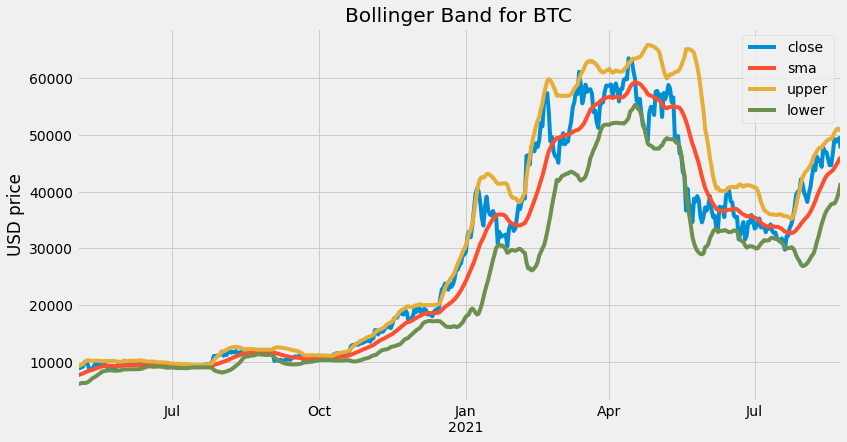

In [ ]:
# Create a list of columns to keep
column_list = ['close','sma','upper','lower']

# Plot the data
df[column_list][period-500:].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for BTC')
plt.ylabel('USD price')
plt.show()

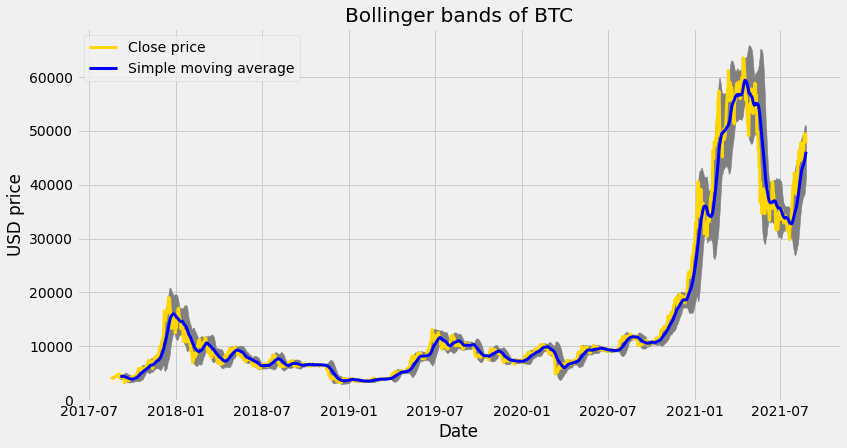

In [ ]:
# Plot and shade the area between the bollinger bands
# First get figure and figure size
fig = plt.figure(figsize=(12.2,6.4))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = df.index
# Plot and shade the area between the upper band and the lower band
ax.fill_between(x_axis, df['upper'], df['lower'], color='grey')
# Plot the closing price and the moving average
ax.plot(x_axis, df['close'], color = 'gold', lw = 3, label = 'Close price')
ax.plot(x_axis, df['sma'], color  ='blue', lw = 3, label = 'Simple moving average')
# Set the title and show the image
ax.set_title('Bollinger bands of BTC')
ax.set_xlabel('Date')
ax.set_ylabel('USD price')
ax.legend()
plt.show()


In [ ]:
# Create a new dataframe
new_df = df[period-500:]
# show new data
new_df

,date,open,high,low,close,volume,sma,std,upper,lower
2020-05-02,2020-05-02,8825.67,9010.00,8753.00,8972.05,59002.087550,7527.5180,732.648058,8992.814117,6062.221883
2020-05-03,2020-05-03,8972.58,9200.00,8712.00,8894.16,90126.065643,7630.3305,773.897631,9178.125763,6082.535237
2020-05-04,2020-05-04,8894.15,8950.00,8522.00,8871.96,84418.512331,7730.4935,799.353146,9329.199793,6131.787207
2020-05-05,2020-05-05,8871.92,9118.58,8760.00,9021.83,76480.765342,7850.5230,804.242324,9459.007649,6242.038351
2020-05-06,2020-05-06,9021.36,9395.00,8906.21,9142.92,105925.302420,7952.5720,833.222727,9619.017454,6286.126546
...,...,...,...,...,...,...,...,...,...,...
2021-08-20,2021-08-20,46760.62,49382.99,46622.99,49322.47,56850.352228,44198.3035,3134.797794,50467.899088,37928.707912
2021-08-21,2021-08-21,49322.47,49757.04,48222.00,48821.87,46745.136584,44647.1250,3121.346865,50889.818730,38404.431270
2021-08-22,2021-08-22,48821.88,49500.00,48050.00,49239.22,37007.887795,45151.6950,2998.828561,51149.352123,39154.037877
2021-08-23,2021-08-23,49239.22,50500.00,49029.00,49488.85,52462.541954,45715.7850,2666.412441,51048.609882,40382.960118


In [ ]:
# Create a function to create buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['close'])):
    if data['close'][i] < data['lower'][i]:
      buy_signal.append(data['close'][i])
      sell_signal.append(np.nan)
    elif data['close'][i] > data['upper'][i]:
      buy_signal.append(np.nan)
      sell_signal.append(data['close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  # # print(data)
  # print(buy_signal)
  # print(sell_signal)

  return(buy_signal, sell_signal)

In [ ]:
print(get_signal(new_df))

([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 10140.85, 10446.25, 10166.69, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [ ]:
# Create two new columns with buy/sell signals
new_df['buy'] = get_signal(new_df)[0]
new_df['sell'] = get_signal(new_df)[1]
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,open,high,low,close,volume,sma,std,upper,lower,buy,sell
2020-05-02,2020-05-02,8825.67,9010.00,8753.00,8972.05,59002.087550,7527.5180,732.648058,8992.814117,6062.221883,NaN,NaN
2020-05-03,2020-05-03,8972.58,9200.00,8712.00,8894.16,90126.065643,7630.3305,773.897631,9178.125763,6082.535237,NaN,NaN
2020-05-04,2020-05-04,8894.15,8950.00,8522.00,8871.96,84418.512331,7730.4935,799.353146,9329.199793,6131.787207,NaN,NaN
2020-05-05,2020-05-05,8871.92,9118.58,8760.00,9021.83,76480.765342,7850.5230,804.242324,9459.007649,6242.038351,NaN,NaN
2020-05-06,2020-05-06,9021.36,9395.00,8906.21,9142.92,105925.302420,7952.5720,833.222727,9619.017454,6286.126546,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,2021-08-20,46760.62,49382.99,46622.99,49322.47,56850.352228,44198.3035,3134.797794,50467.899088,37928.707912,NaN,NaN
2021-08-21,2021-08-21,49322.47,49757.04,48222.00,48821.87,46745.136584,44647.1250,3121.346865,50889.818730,38404.431270,NaN,NaN
2021-08-22,2021-08-22,48821.88,49500.00,48050.00,49239.22,37007.887795,45151.6950,2998.828561,51149.352123,39154.037877,NaN,NaN
2021-08-23,2021-08-23,49239.22,50500.00,49029.00,49488.85,52462.541954,45715.7850,2666.412441,51048.609882,40382.960118,NaN,NaN


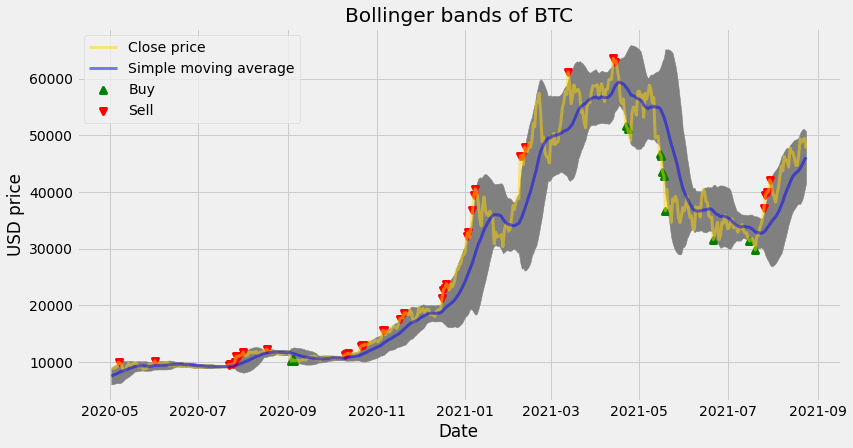

In [ ]:
# Plot all of the data
# First get figure and figure size
fig = plt.figure(figsize=(12.2,6.4))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band
ax.fill_between(x_axis, new_df['upper'], new_df['lower'], color='grey')
# Plot the closing price and the moving average
ax.plot(x_axis, new_df['close'], color = 'gold', lw = 3, label = 'Close price', alpha = 0.5)
ax.plot(x_axis, new_df['sma'], color  ='blue', lw = 3, label = 'Simple moving average', alpha = 0.5)
ax.scatter(x_axis, new_df['buy'], color = 'green', lw = 3, label = 'Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['sell'], color = 'red', lw = 3, label = 'Sell', marker = 'v', alpha = 1)
# Set the title and show the image
ax.set_title('Bollinger bands of BTC')
ax.set_xlabel('Date')
ax.set_ylabel('USD price')
ax.legend()
plt.show()

De code is gelukt en aan de grafiek te zien lijkt deze strategie niet echt bijzondere resultaten op te leveren. Veel buy signalen in een neerwaartse markt en veel verkoopsignalen in een bull markt die je laten uitstappen terwijl de markt nog 1000% omhoog beweegt.
Kortom geleerd dat deze strategie niet werkt, maar de code wel :-)